In [144]:
import pandas as pd

In [145]:
# Importing Dataset
df = pd.read_csv("Shark_Tank_US_dataset.csv")

In [146]:
# DATA ANALYSIS

In [147]:
df.head() # First 5 Rows of Dataset

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,...,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
1,1,MrTod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Technology/Software,Ionic Ear - Novelties,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN


In [148]:
df.shape # Rows and Columns of Dataset

(1441, 53)

In [149]:
df.info() # Dataset Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1441 non-null   int64  
 1   Startup Name                        1441 non-null   object 
 2   Episode Number                      1441 non-null   int64  
 3   Pitch Number                        1441 non-null   int64  
 4   Season Start                        1441 non-null   object 
 5   Season End                          1441 non-null   object 
 6   Original Air Date                   1441 non-null   object 
 7   Industry                            1441 non-null   object 
 8   Business Description                1438 non-null   object 
 9   Company Website                     682 non-null    object 
 10  Pitchers Gender                     1434 non-null   object 
 11  Pitchers Average Age                505 non

In [150]:
# DATA MANIPULATION

In [151]:
# Dropping Irrelevant or Low-Value Columns
columns_to_drop = [
    "Company Website", "Pitchers Average Age", "Pitchers City", "Pitchers State",
    "Entrepreneur Names", "Royalty Deal", "Advisory Shares Equity", "Loan",
    "Deal Has Conditions", "Guest Name", "Guest Present", "Barbara Corcoran Present", "Mark Cuban Present", 
    "Daymond John Present", "Kevin O Leary Present", "Mark Cuban Present", "Season Start", "Season End", 
    "Robert Herjavec Present", "Lori Greiner Present", "Business Description", "Multiple Entrepreneurs"
]
df.drop(columns=columns_to_drop, inplace=True)


In [152]:
# Convert Dates to Datetime
df["Original Air Date"] = pd.to_datetime(df["Original Air Date"], errors="coerce")
# Extracting Year column
df["Air Year"] = df["Original Air Date"].dt.year

/tmp/ipykernel_679/1471211297.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Original Air Date"] = pd.to_datetime(df["Original Air Date"], errors="coerce")


In [153]:
# Filling  Missing Values
deal_cols = [
    "Original Ask Amount", "Original Offered Equity", "Valuation Requested", 
    "Total Deal Amount", "Total Deal Equity", "Deal Valuation", 
    "Number of Sharks in Deal", "Investment Amount Per Shark", "Equity Per Shark"
]

df[deal_cols] = df[deal_cols].fillna(0)
shark_invest_cols = [col for col in df.columns if "Investment" in col and "Amount" in col or "Equity" in col]
df[shark_invest_cols] = df[shark_invest_cols].fillna(0)


In [154]:
# Creating column Investing Sharks
def get_investing_sharks(row):
    sharks = []
    if row["Barbara Corcoran Investment Amount"] > 0:
        sharks.append("Barbara")
    if row["Mark Cuban Investment Amount"] > 0:
        sharks.append("Mark")
    if row["Lori Greiner Investment Amount"] > 0:
        sharks.append("Lori")
    if row["Robert Herjavec Investment Amount"] > 0:
        sharks.append("Robert")
    if row["Daymond John Investment Amount"] > 0:
        sharks.append("Daymond")
    if row["Kevin O Leary Investment Amount"] > 0:
        sharks.append("Kevin")
    if row["Guest Investment Amount"] > 0:
        sharks.append("Guest")
    return ", ".join(sharks) if sharks else "No Deal"

df["Investing Sharks"] = df.apply(get_investing_sharks, axis=1)


In [155]:
# Data summary after manipulation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Season Number                       1441 non-null   int64         
 1   Startup Name                        1441 non-null   object        
 2   Episode Number                      1441 non-null   int64         
 3   Pitch Number                        1441 non-null   int64         
 4   Original Air Date                   1441 non-null   datetime64[ns]
 5   Industry                            1441 non-null   object        
 6   Pitchers Gender                     1434 non-null   object        
 7   US Viewership                       1437 non-null   float64       
 8   Original Ask Amount                 1441 non-null   float64       
 9   Original Offered Equity             1441 non-null   float64       
 10  Valuation Requested     

In [156]:
df.head() # First 5 rows of New dataset

,Season Number,Startup Name,Episode Number,Pitch Number,Original Air Date,Industry,Pitchers Gender,US Viewership,Original Ask Amount,Original Offered Equity,...,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Air Year,Investing Sharks
0,1,AvaTheElephant,1,1,2009-08-09,Health/Wellness,Female,4.15,50000.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,Barbara
1,1,MrTod'sPieFactory,1,2,2009-08-09,Food and Beverage,Male,4.15,460000.0,10.0,...,0.0,0.0,230000.0,25.0,0.0,0.0,0.0,0.0,2009,"Barbara, Daymond"
2,1,Wispots,1,3,2009-08-09,Business Services,Male,4.15,1200000.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,No Deal
3,1,CollegeFoxesPackingBoxes,1,4,2009-08-09,Lifestyle/Home,Male,4.15,250000.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,No Deal
4,1,IonicEar,1,5,2009-08-09,Technology/Software,Male,4.15,1000000.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,No Deal


In [157]:
# Saving clean Dataset
df.to_csv("shark_tank_cleaned.csv", index=False)

In [158]:
# EXPLORATORY DATA ANALYSIS

In [166]:
import matplotlib.pyplot as plt

<Figure size 400x600 with 0 Axes>

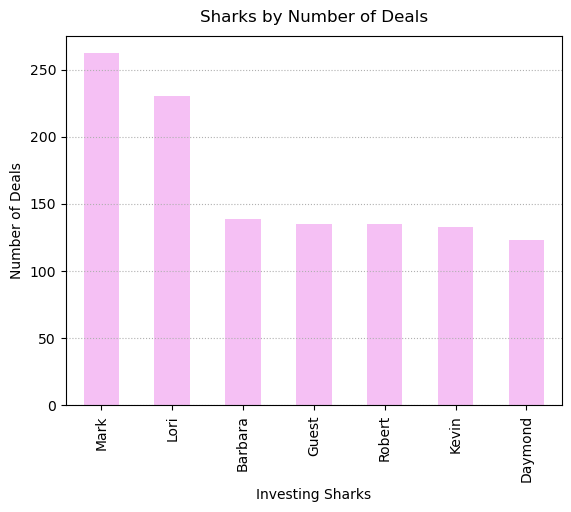

In [193]:
# Count number of deals per shark
sharks_deal = (
    df[df["Got Deal"] == 1]["Investing Sharks"]
    .str.split(", ")
    .explode()
    .value_counts()
)
# Bar graph visual
fig, ax = plt.subplots()
sharks_deal.plot (kind='bar', color='#f5c0f4', ax=ax)
ax.set_title ("Sharks by Number of Deals", loc= "center", pad= 10)
ax.set_xlabel("Investing Sharks")
ax.set_ylabel("Number of Deals")
plt.grid(True, axis='y', linestyle=':')
plt.show()

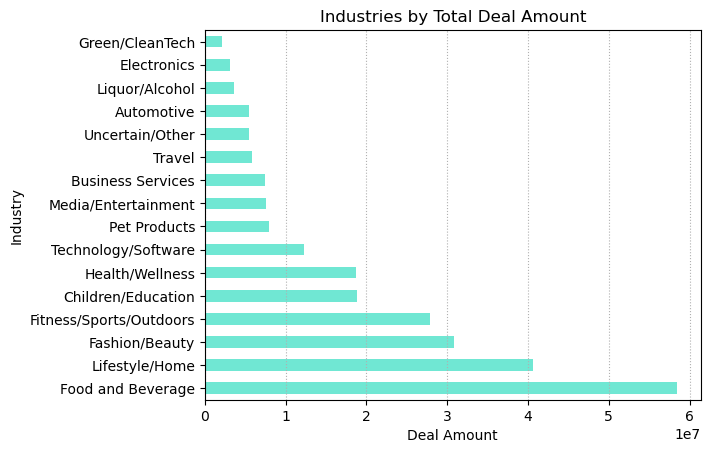

In [194]:
# Calculating Total Deal Amount in each Industry
industry_funding = (
    df.groupby("Industry")["Total Deal Amount"]
    .sum()
    .sort_values(ascending=False)
)
# Horizontal Bar Graph Visual
fig, ax = plt.subplots()
industry_funding.plot(kind="barh", color="#70e7d3", ax=ax)
ax.set_title("Industries by Total Deal Amount")
ax.set_xlabel("Deal Amount")
ax.set_ylabel("Industry")
plt.grid(True, axis='x', linestyle=':')
plt.show()

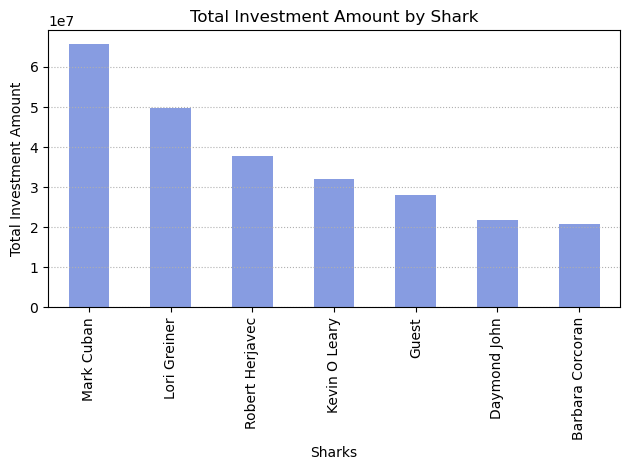

In [197]:
# Dictionary of shark names and their investment amount columns
shark_investment_columns = {
    "Barbara Corcoran": "Barbara Corcoran Investment Amount",
    "Mark Cuban": "Mark Cuban Investment Amount",
    "Lori Greiner": "Lori Greiner Investment Amount",
    "Robert Herjavec": "Robert Herjavec Investment Amount",
    "Daymond John": "Daymond John Investment Amount",
    "Kevin O Leary": "Kevin O Leary Investment Amount",
    "Guest": "Guest Investment Amount"
}

# Sum total investment for each shark
shark_total_investments = {
    shark: df[col].sum()
    for shark, col in shark_investment_columns.items()
}

# Convert to pandas Series for easy plotting
import pandas as pd
shark_series = pd.Series(shark_total_investments).sort_values(ascending=False)

# Bar Graph visual
fig, ax = plt.subplots()
shark_series.plot(kind='bar', color='#879ce1', ax=ax)
ax.set_title("Total Investment Amount by Shark")
ax.set_ylabel("Total Investment Amount")
ax.set_xlabel("Sharks")
plt.grid(True, axis='y', linestyle=':')
plt.tight_layout()
plt.show()
